In [1]:
import numpy
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3
                                                     )

Using TensorFlow backend.


In [2]:
# Get IMDB word index
imdb_word_index = imdb.get_word_index()

# Reverse IMDB word index
# Source: https://jamesmccaffrey.wordpress.com/2018/04/27/inspecting-the-imdb-dataset-reverse-mapping-the-index-values/imdb_review_index_to_words/
for (k, v) in imdb_word_index.items():
    imdb_word_index[k]=v+3

imdb_index_word={}
imdb_index_word[0]="<PAD>"
imdb_index_word[1]="<START>"
imdb_index_word[2]="<OOV>"
for (k, v) in imdb_word_index.items():
    imdb_index_word[v] = k

In [3]:
# จำนวนคำทั้งหมดของ IMDB
print("จำนวนคำทั้งหมดของ IMDB:", len(imdb_word_index.keys()))
# ความยาวสูงสุดของประโยคใน IMDB
maxlen = max([len(s) for s in x_train])
print("IMDB max length: ", maxlen)

จำนวนคำทั้งหมดของ IMDB: 88584
IMDB max length:  2494


Sentence Mean:  238.71364
Sentence STD:  176.49367364852034
Sentence Most Len:  591


(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <a list of 10 Patch objects>)

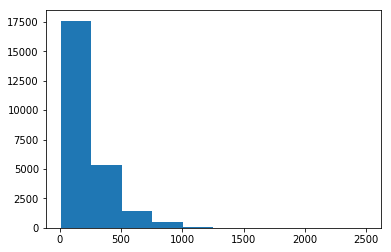

In [4]:
# Idea from http://www.awesomestats.in/python-dl-imdb-classification-1/
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sentence_len=np.array([len(s) for s in x_train])
print("Sentence Mean: ",sentence_len.mean())
print("Sentence STD: ",sentence_len.std())
most_sentence_len = int(sentence_len.mean() + (2* sentence_len.std()))
print("Sentence Most Len: ",most_sentence_len)
plt.hist(sentence_len)

In [5]:
# ข้อมูลถูกทำให้เป็น Sequence (Integer Vector) อยู่แล้ว
print("Train Data [0]:\n", x_train[0])
print(" ".join([imdb_index_word[w] for w in x_train[0]]))
print("Train Label [0]:\n", y_train[0])
print("Test Data [0]:\n", x_test[0])
print(" ".join([imdb_index_word[w] for w in x_test[0]]))
print("Test Label [0]:\n", y_test[0])

Train Data [0]:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<START> this film w

In [7]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
pad_x_train=pad_sequences(x_train, maxlen=most_sentence_len, padding='post', truncating='post')
pad_x_test=pad_sequences(x_test, maxlen=most_sentence_len, padding='post', truncating='post')
cat_y_train=to_categorical(y_train)
cat_y_test=to_categorical(y_test)

In [8]:
print(pad_x_train[0])
print(cat_y_train[0])

[    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670 22665     9    35   480   284     5   150     4   172   112
   167 21631   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4 31050     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   104    88     4   381   

## แบบที่ 1 ใช้ข้อมูลทั้งหมด

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

embedding_vecor_length = 32

# +3 เพราะ index_from =3
vocab_size = len(imdb_word_index.keys()) +3

# Fix Random Weight
# For reproducable
np.random.seed(7)

print("Vocab Size: ", vocab_size)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_vecor_length,
                    input_length=most_sentence_len))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(pad_x_train, cat_y_train,
          epochs=3,
          batch_size=64,
          verbose=1
         )

Vocab Size:  88587
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 591, 32)           2834784   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,888,186
Trainable params: 2,888,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
25000/25000 [==============================] - 367s 15ms/step - loss: 0.6934 - acc: 0.5014
Epoch 2/3
25000/25000 [==============================] - 410s 16ms/step - loss: 0.6985 - acc: 0.5030
Epoch 3/3
25000/25000 [==============================] - 397s 16ms/step - loss: 0.6811 - acc: 0.5217


# แบบที่ 2 ใช้ข้อมูลแค่บางส่วน

In [120]:
import numpy
from keras.datasets import imdb

# เลือกเฉพาะ 500 คำที่ปรากฏมากที่สุด
num_words = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [121]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

#จำนวนคำ สูงสุดในแต่ละประโยค
maxlen=100

pad_x_train=pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
pad_x_test=pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')
cat_y_train=to_categorical(y_train)
cat_y_test=to_categorical(y_test)

In [122]:
# Model 2
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

embedding_vecor_length = 32

# Fix Random Weight
# For reproducable
np.random.seed(7)

model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_vecor_length,
                    input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(pad_x_train, cat_y_train,
          epochs=3,
          batch_size=64,
          verbose=1
         )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 32)           16000     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 202       
Total params: 69,402
Trainable params: 69,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
25000/25000 [==============================] - 64s 3ms/step - loss: 0.5863 - acc: 0.6794
Epoch 2/3
25000/25000 [==============================] - 70s 3ms/step - loss: 0.4956 - acc: 0.7642
Epoch 3/3
25000/25000 [==============================] - 65s 3ms/step - loss: 0.4827 - acc: 0.7686


# แบบที่ 3

In [124]:
import numpy
from keras.datasets import imdb

# เลือกเฉพาะ 50,000 คำที่ปรากฏมากที่สุด
num_words = 50000

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [125]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

#จำนวนคำ สูงสุดในแต่ละประโยค
maxlen=100

pad_x_train=pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
pad_x_test=pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')
cat_y_train=to_categorical(y_train)
cat_y_test=to_categorical(y_test)

In [126]:
# Model 3
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

embedding_vecor_length = 32

# Fix Random Weight
# For reproducable
np.random.seed(7)

model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_vecor_length,
                    input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(pad_x_train, cat_y_train,
          epochs=3,
          batch_size=64,
          verbose=1
         )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 32)           1600000   
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 202       
Total params: 1,653,402
Trainable params: 1,653,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
25000/25000 [==============================] - 80s 3ms/step - loss: 0.5055 - acc: 0.7374
Epoch 2/3
25000/25000 [==============================] - 81s 3ms/step - loss: 0.2701 - acc: 0.8978
Epoch 3/3
25000/25000 [==============================] - 78s 3ms/step - loss: 0.1631 - acc: 0.9446


In [127]:
loss, accuracy=model.evaluate(x=pad_x_test, y=cat_y_test)
print("Loss:     %8.2f" % (loss))
print("Accuracy: %8.2f" % ( accuracy*100))

25000/25000 [==============================] - 23s 919us/step
Loss:         0.62
Accuracy:    78.12
